In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Countries and file paths
countries = ["benin", "sierraleone-bumbuna", "togo-dapaong_qc"]
files = {country: f"data/{country}_clean.csv" for country in countries}

In [3]:
# Load data and tag with country name
df_list = []
for country, path in files.items():
    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"Failed to load {country} data from {path}: {e}")
        continue
    df["Country"] = country.capitalize()
    df_list.append(df)



In [4]:
# Combine all countries into one DataFrame
all_data = pd.concat(df_list, ignore_index=True)



In [5]:
# Drop rows with missing values in GHI, DNI, DHI
metrics = ["GHI", "DNI", "DHI"]
all_data = all_data.dropna(subset=metrics)


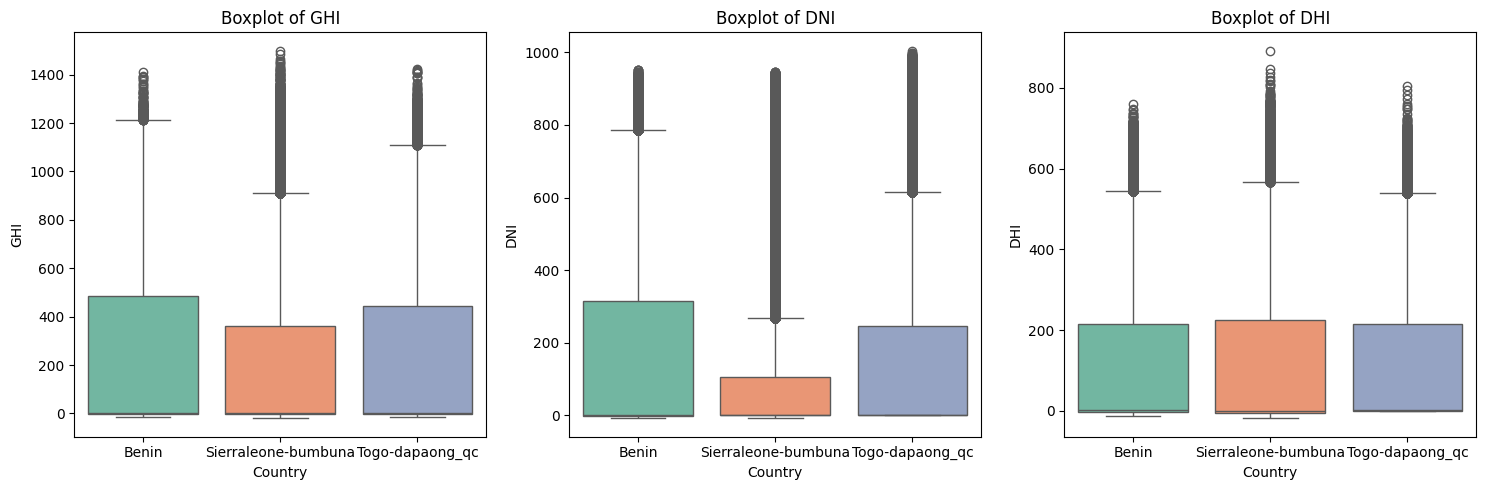

In [6]:
# 1. Boxplots for each metric
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x="Country", y=metric, hue="Country", data=all_data, palette="Set2", legend=False)
    plt.title(f"Boxplot of {metric}")
    plt.ylabel(metric)
    plt.xlabel("Country")
plt.tight_layout()
plt.show()


In [7]:

# 2. Summary Table: Mean, Median, Std Dev per Country
summary_stats = all_data.groupby("Country")[metrics].agg(["mean", "median", "std"])
print("\nSummary Statistics:")
print(summary_stats.round(2))



Summary Statistics:
                        GHI                    DNI                    DHI  \
                       mean median     std    mean median     std    mean   
Country                                                                     
Benin                240.56    1.8  331.13  167.19   -0.1  261.71  115.36   
Sierraleone-bumbuna  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   
Togo-dapaong_qc      230.56    2.1  322.53  151.26    0.0  250.96  116.44   

                                    
                    median     std  
Country                             
Benin                  1.6  158.69  
Sierraleone-bumbuna   -0.1  158.95  
Togo-dapaong_qc        2.5  156.52  


### Statistical Testing

In [8]:
import scipy.stats as stats

# One-way ANOVA to compare GHI across countries
ghi_groups = [group["GHI"].dropna().values for name, group in all_data.groupby("Country")]
anova_result = stats.f_oneway(*ghi_groups)

print("\nOne-way ANOVA Results for GHI:")
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"p-value: {anova_result.pvalue:.5f}")

# Interpretation note
if anova_result.pvalue < 0.05:
    print("\nThe differences in GHI between countries are statistically significant (p < 0.05).")
else:
    print("\nNo statistically significant difference in GHI between countries (p >= 0.05).")



One-way ANOVA Results for GHI:
F-statistic: 2090.093
p-value: 0.00000

The differences in GHI between countries are statistically significant (p < 0.05).


### Key Observations


### Key Observations

- Benin has the highest median and mean GHI, indicating strong overall solar irradiance but with greater variability.
- Sierra Leone (Bumbuna) shows the lowest average DNI and DHI, suggesting lower direct and diffuse solar radiation potential.
- Togo (Dapaong QC) demonstrates consistent solar metrics with moderate average values and the smallest standard deviations across GHI, DNI, and DHI.



### Visual Summary


/tmp/ipykernel_417058/1958158900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


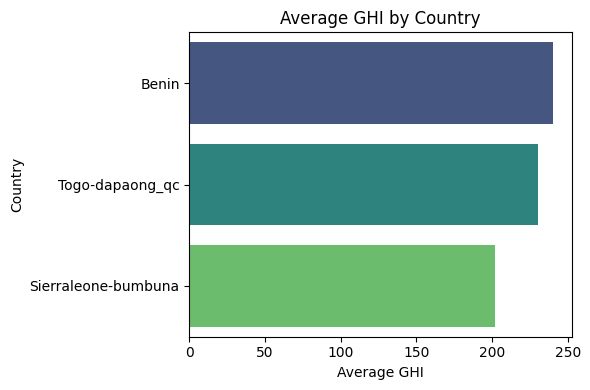

In [9]:
# Compute average GHI per country
avg_ghi = all_data.groupby("Country")["GHI"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()